# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости.

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  

**Цель исследования**:
1. Определить рыночную стоимость объектов недвижимости и типичные параметры квартиры.

**Ход исследования**
Проведем предобработку данных. Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки выявим возможность исправить самые критичные ошибки данных.

Рассчитаем среднюю стоимость квадратного метра. Проведем анализ параметров квартир. Для этого построим гистограммы, боксплоты, диаграммы рассеивания.

В конце напишем общий вывод.
 
Таким образом, исследование пройдёт в несколько этапов:
 1. Изучение общей информации.
 2. Предобработка данных.
 3. Расчёт и добавление результатов в таблицу.
 4. Исследовательский анализ данных. 
 5. Общий вывод.

### Исследование объявлений о продаже квартир.
_____

###### Данное исследование разделим на несколько частей.

#### Часть 1. Изучение данных из файла:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
#### Часть 2. Предобработка данных:
* [1. Пропуски значений.](#2-bullet)
* [2. Нахождение и исправление аномалий и ошибок.](#3-bullet)
* [3. Приведение данных к нужным типам.](#4-bullet)
#### Часть 3. Расчёт и добавление результатов в таблицу:
* [1. Расчет цены квадратного метра квартиры.](#5-bullet)
* [2. Создание столбцов с днями неделями, месяцев и годами публикации объявления.](#6-bullet)
* [3. Категоризация этажности квартир.](#7-bullet)
* [4. Вычисление соотношения между важными параметрами квартиры.](#8-bullet)
* [5. Вычисление соотношения между площади кухни к общей площади квартиры.](#9-bullet)
#### Часть 4. Исследовательский анализ данных:
* [1. Изучение параметров квартиры.](#10-bullet)
* [2. Изучение зависимостей между параметрами квартиры.](#11-bullet)
* [3. Вычисление средней цены квадратного метра жилья.](#12-bullet)
* [4. Анализ основных параметров жилья в центре Санкт-Петербурга.](#13-bullet)
##### Итоги исследования

## Изучение данных из файла

<a id='1-bullet'></a>
### Изучение файлов с данными, получение общей информации, загрузка библиотек.

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt #импорт matplotlib

Прочитаем файл `/datasets/data.csv` из папки `/datasets` и сохраним его в переменной `df`:

In [2]:
df = pd.read_csv("D:\\Programs\\real_estate_data.csv", sep='\t') # чтение файла с данными и сохранение в df

Выведем на экран первые 10 строк таблицы

In [3]:
df.head(10) # получение первых 10 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Также необходимо посмотреть общую информацию о таблице

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбцы. Тип данных в столбцах — `object`, `int64`, `float64`,`bool`.

Согласно документации к данным:
* `airports_nearest`  — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` —  свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Количество ненулевых значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Вывод

В каждой строке таблицы — данные о квартирах. Часть колонок описывает информацию о самой квартире: этаж, число комнат, число балконов, площадь, высота потолков.Другие связаны с окружением. Остальные данные связаны с продажей: число фотографий в объявлении, цена.

Колонка `is_apartment` имеет тип данных - `object`. Но в документации прописан тип данных - `bool`.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез, но встречаются пропуски в данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

<a id='2-bullet'></a>
### Пропуски значений

Посчитаем количество пропусков в данных.

In [5]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Отсутсвуют данные в столбцах, описывающих балконы, высоту потолков, жилую площадь, является ли квартира апартаментами, площадь кухни, название населенного пункта, расстояния до ближайщего аэропорта и центра, сколько дней было размещенно объявление.

<a id='3-bullet'></a>
### Нахождение и исправление аномалий и ошибок.

Изучая столбец `ceiling_height`, наткнулся на аномальные значения высоты потолков:

In [6]:
df.query('ceiling_height > 10').sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17496,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,NaN,...,12.0,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20507,12,5950000.0,60.0,2018-02-19T00:00:00,2,22.6,14.0,35.0,11,NaN,...,13.0,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
18545,6,3750000.0,43.0,2019-03-18T00:00:00,2,25.0,5.0,29.0,3,False,...,NaN,NaN,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0
11285,0,1950000.0,37.0,2019-03-20T00:00:00,1,25.0,5.0,17.0,4,False,...,9.0,2.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
14382,9,1700000.0,35.0,2015-12-04T00:00:00,1,25.0,5.0,20.0,2,False,...,8.0,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0


Высоты потолка в 20 метров и более не бывает. Скорее всего неверно были введены данные. Разделим значение высоты потолка на 10, чтобы получить адекватную высоту потолка.

In [7]:
for index in range(len(df['ceiling_height'])):
    if df.loc[index,'ceiling_height'] >=20:
        df.loc[index,'ceiling_height'] = df.loc[index,'ceiling_height']/10              

In [8]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] 

In [9]:
for index in range(len(df['cityCenters_nearest'])):
    df.loc[index,'cityCenters_nearest_km'] = df.loc[index,'cityCenters_nearest']/1000   

In [10]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round(0)

Заполним пропуски в столбце `ceiling_height` стандартным значением высоты потолка - 2,6 м:

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.6)

Пропущенные значения в столбце `floors_total` заполнить не удастся, так как невозможно узнать количество этажей в доме или заменить его каким-либо значением.

<a id='4-bullet'></a>
### Приведение данных к нужным типам.

Колонка `is_apartment` имеет тип данных - `object`. Но в документации прописан тип данных - `bool`. Изменим тип данных согласно документации.

In [12]:
df['is_apartment'] = df['is_apartment'].astype('bool')

В столбеце `is_apartment` пропуски логичнее заполнить значением `False`, так как в этих строках квартиры вероятно не являтся апартаментами.

In [13]:
df['is_apartment'] = df['is_apartment'].fillna(False)

В столбеце `balcony` пропуски логичнее заполнить значением `0`, так как в этих строках в квартирах вероятно нет балконов.

In [14]:
df['balcony'] = df['balcony'].fillna(0)

Доля пропусков в столбцах `living_area` и `kitchen_area` состявляет около 9%. Пропуски данных могут быть связаны с тем, что некоторы люди не заполнили эти данные в своих анкетах. Пропущенные значения в столбцах можно заменить медианым значением по каждому типу квартиры, так как наши данные не однородны.

In [15]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))

In [16]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('median'))

Столбец `first_day_exposition` имеет неправильный тип данных. Поменяем его на формат  `datetime`:

In [17]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
df.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                 86
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                197
balcony                       0
locality_name                49
airports_nearest           5542
cityCenters_nearest        5519
parks_around3000           5518
parks_nearest             15620
ponds_around3000           5518
ponds_nearest             14589
days_exposition            3181
cityCenters_nearest_km     5519
dtype: int64

Пропуски в большинстве столбцов были заполнены медианным или стандартным значением. Пропуски в столбцах, взятых на основе картографических данных, невозможно заполнить, так как у нас нет данных нет данных адреса квартиры. Столбцы, имеющие неправильный тип данных, были отфарматированы.

## Расчёты и добавление результатов в таблицу

<a id='5-bullet'></a>
### Расчет цены квадратного метра квартиры.

Рассчитаем цену за квадратный метр:

In [19]:
df['area_price'] = df['last_price']/df['total_area'] #добавление стоимости квадратного метра в таблицу

<a id='6-bullet'></a>
### Создание столбцов с днями неделями, месяцев и годами публикации объявления.

In [20]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday #добавление дня недели в таблицу

In [21]:
df['month_exposition'] = df['first_day_exposition'].dt.month #добавление  месяца в таблицу

In [22]:
df['year_exposition'] = df['first_day_exposition'].dt.year #добавление года в таблицу

<a id='7-bullet'></a>
### Категоризация этажности квартир.

Создадим функцию, которая возвращает группу по значению этажа `floor`, используя правила:
* `floor` равен 1 — `первый`;
* `floor` равен `floors_total` — `последний`;
* `floor` не равен `floors_total` и `floor` не равен 1 — `другой`;

In [23]:
def floor_group(row): # создание функции для категоризации 'этажа'
    try:
        if row['floor'] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        return 'другой'

In [24]:
df['floor_category'] = df.apply(floor_group, axis=1) # создание нового столбца с категориями этажа
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,area_price,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,...,482.0,2.0,755.0,NaN,16.0,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.60,11.0,18.60,1,True,...,NaN,0.0,NaN,81.0,19.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.60,5.0,34.30,4,True,...,90.0,2.0,574.0,558.0,14.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,45.00,9,True,...,84.0,3.0,234.0,424.0,7.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,...,112.0,1.0,48.0,121.0,8.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.60,12.0,14.40,5,True,...,NaN,NaN,NaN,55.0,NaN,95065.789474,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.60,26.0,10.60,6,True,...,NaN,0.0,NaN,155.0,19.0,99195.710456,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.60,24.0,30.50,22,True,...,NaN,0.0,NaN,NaN,12.0,110544.692737,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.60,27.0,15.43,26,True,...,NaN,NaN,NaN,189.0,NaN,87454.764777,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,...,NaN,0.0,NaN,289.0,15.0,88524.590164,6,2,2017,другой


<a id='8-bullet'></a>
### Вычисление соотношения между жилой и общей площади квартиры.

In [25]:
df['ratio_of_resid_and_total'] = df['living_area']/df['total_area'] #добавление соотношения жилой и общей площади

<a id='9-bullet'></a>
### Вычисление соотношения между площади кухни к общей площади квартиры.

In [26]:
df['ratio_of_resid_and_total'] = df['kitchen_area']/df['total_area']#добавление соотношения площади кухни к общей

## Исследовательский анализ данных.

<a id='10-bullet'></a>
### Изучение параметров квартиры.

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Для этого построим гистограммы для каждого параметра.

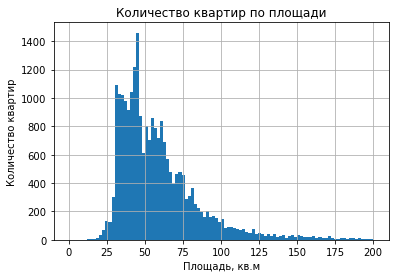

In [27]:
df['total_area'].hist(bins=100, range=(0,200)) #построение гистограммы столбца total_area
plt.title('Количество квартир по площади')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()

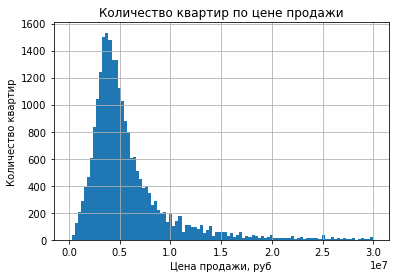

In [28]:
df['last_price'].hist(bins=100, range=(0,30000000)) #построение гистограммы столбца last_price
plt.title('Количество квартир по цене продажи')
plt.xlabel('Цена продажи, руб')
plt.ylabel('Количество квартир')
plt.show()

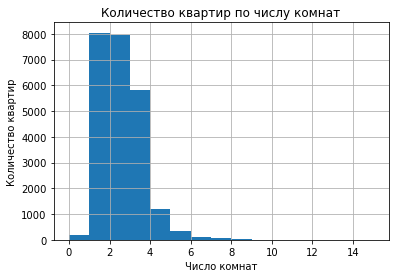

In [29]:
df['rooms'].hist(bins=15, range=(0,15)) #построение гистограммы столбца rooms
plt.title('Количество квартир по числу комнат')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()

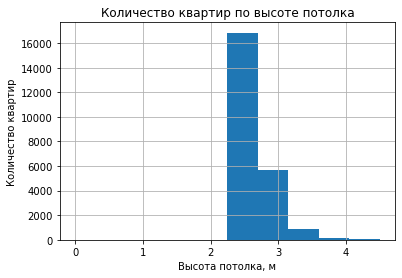

In [30]:
df['ceiling_height'].hist(bins=10, range=(0,4.5)) #построение гистограммы столбца ceiling_height
plt.title('Количество квартир по высоте потолка')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество квартир')
plt.show()

Изучим время продажи квартиры. Построим гистограмму, посчитаем среднее и медиану.

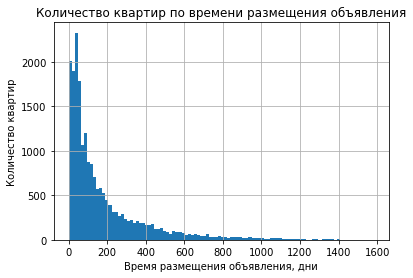

In [31]:
df['days_exposition'].hist(bins=100) #построение гистограммы столбца days_exposition
plt.title('Количество квартир по времени размещения объявления')
plt.xlabel('Время размещения объявления, дни')
plt.ylabel('Количество квартир')
plt.show()

In [32]:
df['days_exposition'].describe() #описание столбца days_exposition

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

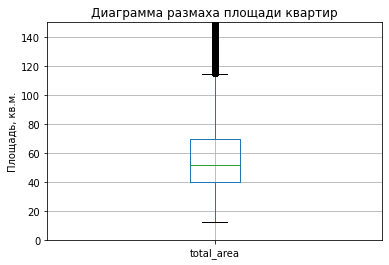

In [33]:
df.boxplot(column='total_area')
plt.ylim(0, 150)
plt.title('Диаграмма размаха площади квартир')
plt.ylabel('Площадь, кв.м.')
plt.show()

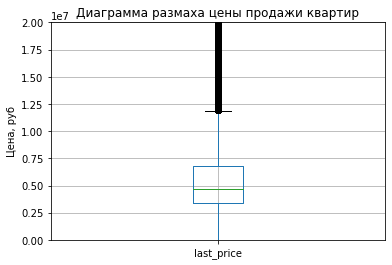

In [34]:
df.boxplot(column='last_price')
plt.ylim(0, 20000000)
plt.title('Диаграмма размаха цены продажи квартир')
plt.ylabel('Цена, руб')
plt.show()

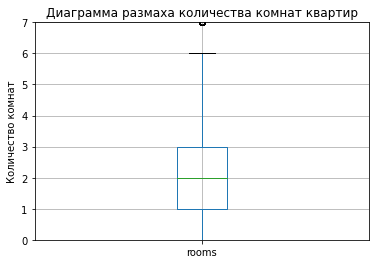

In [35]:
df.boxplot(column='rooms')
plt.ylim(0, 7)
plt.title('Диаграмма размаха количества комнат квартир')
plt.ylabel('Количество комнат')
plt.show()

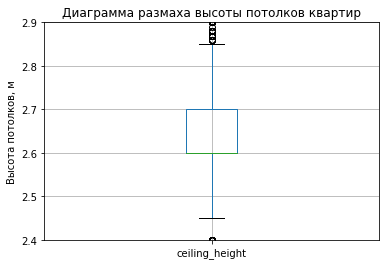

In [36]:
df.boxplot(column='ceiling_height')
plt.ylim(2.4,2.9)
plt.title('Диаграмма размаха высоты потолков квартир')
plt.ylabel('Высота потолков, м')
plt.show()

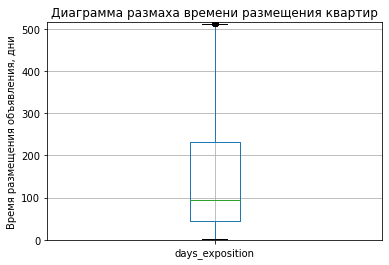

In [37]:
df.boxplot(column='days_exposition')
plt.ylim(0,515)
plt.title('Диаграмма размаха времени размещения квартир')
plt.ylabel('Время размещения объявления, дни')
plt.show()

Можно утверждать, что обычно квартира продается от 45 до 232 дней. Можно считать, что квартира продается необычайно долго, если ее объявление размещенно на сайте более 1000 дней и необычайно быстро, если 1 день

Уберем редкие и выбивающиеся значения.

In [38]:
good_df = df.query('last_price <= 12500000') #срез данных по столбцу last_price

In [39]:
good_df = good_df.query('rooms <= 6') #срез данных по столбцу rooms

In [40]:
good_df = good_df.query('2.45 <=ceiling_height <= 2.9') #срез данных по столбцу ceiling_height

In [41]:
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19981 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              19981 non-null  int64         
 1   last_price                19981 non-null  float64       
 2   total_area                19981 non-null  float64       
 3   first_day_exposition      19981 non-null  datetime64[ns]
 4   rooms                     19981 non-null  int64         
 5   ceiling_height            19981 non-null  float64       
 6   floors_total              19906 non-null  float64       
 7   living_area               19981 non-null  float64       
 8   floor                     19981 non-null  int64         
 9   is_apartment              19981 non-null  bool          
 10  studio                    19981 non-null  bool          
 11  open_plan                 19981 non-null  bool          
 12  kitchen_area      

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23699 non-null  int64         
 1   last_price                23699 non-null  float64       
 2   total_area                23699 non-null  float64       
 3   first_day_exposition      23699 non-null  datetime64[ns]
 4   rooms                     23699 non-null  int64         
 5   ceiling_height            23699 non-null  float64       
 6   floors_total              23613 non-null  float64       
 7   living_area               23699 non-null  float64       
 8   floor                     23699 non-null  int64         
 9   is_apartment              23699 non-null  bool          
 10  studio                    23699 non-null  bool          
 11  open_plan                 23699 non-null  bool          
 12  kitchen_area      

Количество потерянных данных составило около 15% процентов.

<a id='11-bullet'></a>
### Изучение зависимостей между параметрами квартиры.

Проверим есть ли зависимость между ценной квартиры и ее площадью.

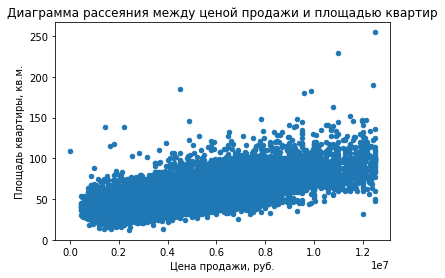

In [43]:
good_df.plot(x='last_price', y='total_area', kind='scatter') #построение диаграммы рассеяния между столбцом last_price и total_area
plt.title('Диаграмма рассеяния между ценой продажи и площадью квартир')
plt.xlabel('Цена продажи, руб.')
plt.ylabel('Площадь квартиры, кв.м.')
plt.show()

На диаграмме видно, что с учеличением площади квартиры цена также растет.

Проверим также есть ли зависимость между ценной квартиры и числом комнат в ней.

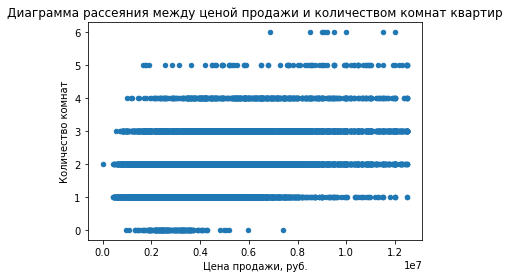

In [44]:
good_df.plot(x='last_price', y='rooms', kind='scatter') #построение диаграммы рассеяния между столбцом last_price и rooms
plt.title('Диаграмма рассеяния между ценой продажи и количеством комнат квартир')
plt.xlabel('Цена продажи, руб.')
plt.ylabel('Количество комнат')
plt.show()

С увеличением числа комнат можно наблюдать, что плотность точек становится больше в правой части графика. Что говорит о связи цены квартиры и количеством комнат.

Проверим также есть ли зависимость между ценной квартиры и расстоянием от центра.

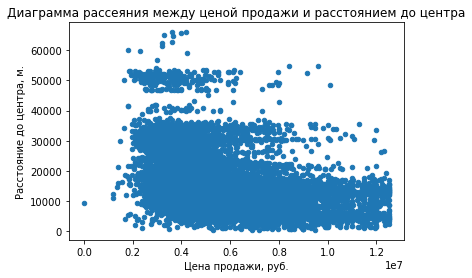

In [45]:
good_df.plot(x='last_price', y='cityCenters_nearest', kind='scatter') #расчет коэффициента корреляции между столбцом last_price и cityCenters_nearest
plt.title('Диаграмма рассеяния между ценой продажи и расстоянием до центра')
plt.xlabel('Цена продажи, руб.')
plt.ylabel('Расстояние до центра, м.')
plt.show()

С увеличением расстояния от центра города можно наблюдать, что плотность точек становится больше в левой части графика. Что говорит о связи цены квартиры и удаленностью от центра.

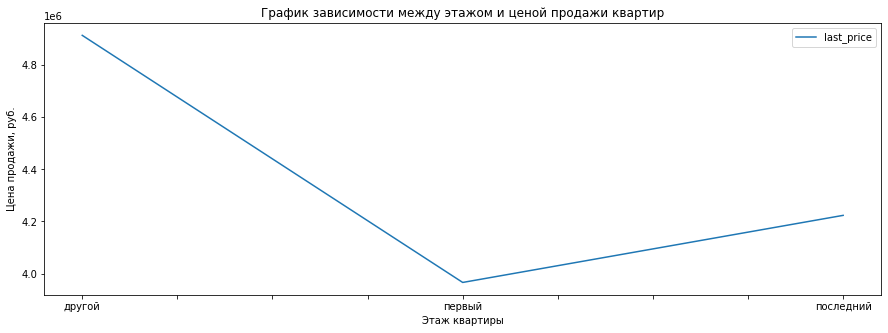

In [46]:
good_df.pivot_table(index='floor_category', values='last_price', aggfunc='mean').plot(figsize=(15,5)) #построение сводной таблицы и графика
plt.title('График зависимости между этажом и ценой продажи квартир')
plt.xlabel('Этаж квартиры')
plt.ylabel('Цена продажи, руб.')
plt.show()

Исходя из сводной таблицы, можно сказать, что цена на первом этаже ниже, чем на последнем или на другом. Цена квартиру на последнем этаже в среднем ниже, чем на другом, но выше, чем на первом.

Проверим есть ли зависимость  от даты размещения: дня недели, месяца и года

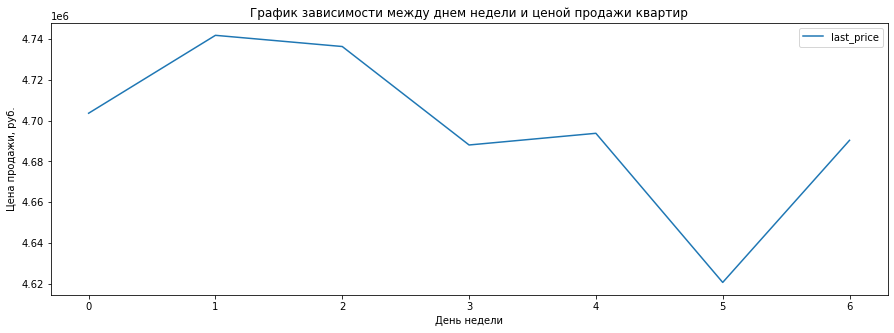

In [47]:
good_df.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').plot(figsize=(15,5)) #построение сводной таблицы и графика
plt.title('График зависимости между днем недели и ценой продажи квартир')
plt.xlabel('День недели')
plt.ylabel('Цена продажи, руб.')
plt.show()

Исходя из сводной таблицы, можно сказать, что цена квартиры размещенная в будний день в среднем выше, чем в выходной. Самая дорогие по цене квартиры размещены во вторник.

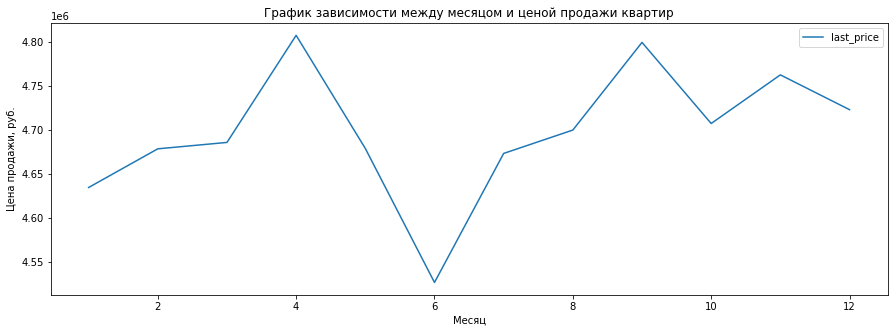

In [48]:
good_df.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot(figsize=(15,5)) #построение сводной таблицы и график
plt.title('График зависимости между месяцом и ценой продажи квартир')
plt.xlabel('Месяц')
plt.ylabel('Цена продажи, руб.')
plt.show()

Исходя из сводной таблицы, можно сказать, что цена квартиры размещенные в апреле, августе, сентябрь или в ноябре в среднем выше, чем в остальные месяцы. Самая дешевые в среднем квартиры размещены в июне.

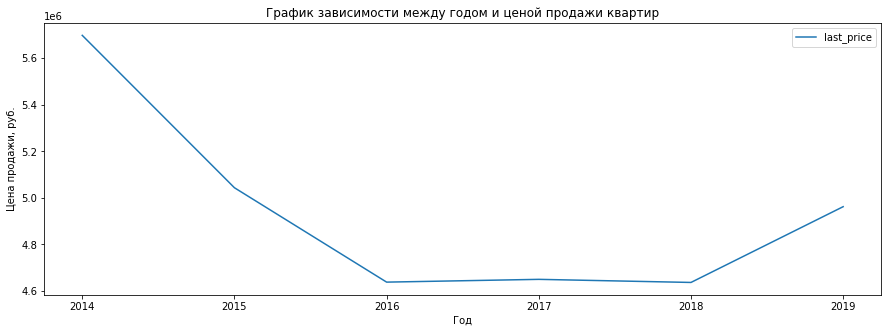

In [49]:
good_df.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(figsize=(15,5)) #построение сводной таблицы и график
plt.title('График зависимости между годом и ценой продажи квартир')
plt.xlabel('Год')
plt.ylabel('Цена продажи, руб.')
plt.show()

Исходя из сводной таблицы, можно сказать, что цены на квартиры падали до 2016 года, а после 2018 года произошел рост цен.

<a id='12-bullet'></a>
### Вычисление средней цены квадратного метра жилья.

In [50]:
good_df['ratio_area_and_price'] = good_df['last_price']/good_df['total_area'] #расчет средней стоимости квадратного метра жилья

In [51]:
top_locality = good_df['locality_name'].value_counts().head(10) #вывод топ 10 городов по числу размещений объявлений по продаже квартир
top_locality 

Санкт-Петербург      12414
посёлок Мурино         517
посёлок Шушары         438
Всеволожск             384
посёлок Парголово      326
Колпино                316
Пушкин                 304
деревня Кудрово        297
Гатчина                287
Выборг                 211
Name: locality_name, dtype: int64

In [52]:
top_locality_df = good_df.query('locality_name in @top_locality.index') #срез данных по индексам топ 10 городов из пункта выше

In [53]:
top_locality_df.pivot_table(index='locality_name', values='ratio_area_and_price', aggfunc='mean') #построение сводной таблицы 

,ratio_area_and_price
locality_name,
Всеволожск,67025.971030
Выборг,57342.019366
Гатчина,68108.459961
Колпино,75340.258443
Пушкин,100165.618962
Санкт-Петербург,104956.810156
деревня Кудрово,92463.092416
посёлок Мурино,85765.047384
посёлок Парголово,90332.263023


Самая высокая цена за квадратный метр в Санкт-Петербурге, а самая низкая в Выборге.

<a id='13-bullet'></a>
### Анализ основных параметров жилья в центре Санкт-Петербурга.

In [54]:
Saint_P_df = good_df.query('locality_name == "Санкт-Петербург"') #срез данных по Санкт-Петербургу

In [55]:
center = Saint_P_df.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean') #построение сводной таблицы
center.columns = ['last_price_mean'] #переименование столбца сводной таблицы

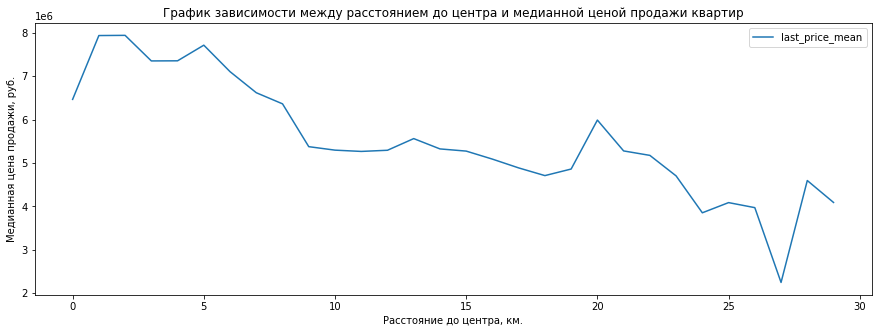

In [56]:
center.plot(y='last_price_mean', figsize=(15,5)) #построение графика сводной таблицы
plt.title('График зависимости между расстоянием до центра и медианной ценой продажи квартир')
plt.xlabel('Расстояние до центра, км.')
plt.ylabel('Медианная цена продажи, руб.')
plt.show()

По графику видно, что при удалении от центра цена квартиры снижается. Границей центра можно считать 10 км.

In [57]:
Saint_P_df_centre = Saint_P_df.query('cityCenters_nearest_km<=10') #срез данных по центру Санкт-Петербурга

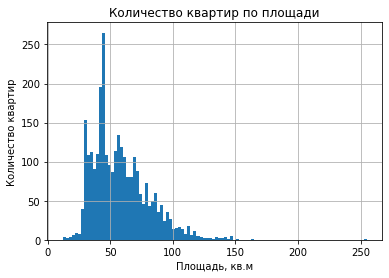

In [58]:
Saint_P_df_centre['total_area'].hist(bins=100)  #построение гистограммы столбца total_area
plt.title('Количество квартир по площади')
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()

In [59]:
Saint_P_df_centre['total_area'].describe()

count    2859.000000
mean       57.990535
std        22.333520
min        12.000000
25%        42.000000
50%        54.000000
75%        70.700000
max       255.000000
Name: total_area, dtype: float64

В среднем, большинство квартир имеют площадь от 30 до 100 кв. метров. Среднее: 68 кв. метров.

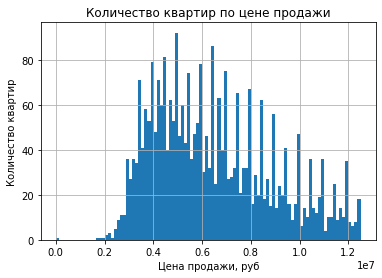

In [60]:
Saint_P_df_centre['last_price'].hist(bins=100) #построение гистограммы столбца
plt.title('Количество квартир по цене продажи')
plt.xlabel('Цена продажи, руб')
plt.ylabel('Количество квартир')
plt.show()

In [61]:
Saint_P_df_centre['last_price'].describe()

count    2.859000e+03
mean     6.491307e+06
std      2.455639e+06
min      1.219000e+04
25%      4.495000e+06
50%      6.080000e+06
75%      8.150000e+06
max      1.250000e+07
Name: last_price, dtype: float64

In [62]:
good_df['last_price'].describe()

count    1.998100e+04
mean     4.703494e+06
std      2.180640e+06
min      1.219000e+04
25%      3.250000e+06
50%      4.300000e+06
75%      5.748000e+06
max      1.250000e+07
Name: last_price, dtype: float64

Большинство квартир стоят от 2,5 миллионов до 12,5 миллионов рублей. Средняя стоимость 7,9 миллионов рублей

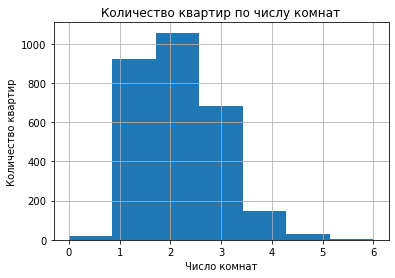

In [63]:
Saint_P_df_centre['rooms'].hist(bins=7) #построение гистограммы столбца
plt.title('Количество квартир по числу комнат')
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.show()

In [64]:
Saint_P_df_centre['rooms'].describe()

count    2859.000000
mean        2.043022
std         0.952641
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

In [65]:
good_df['rooms'].describe()

count    19981.000000
mean         1.895351
std          0.893872
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Большинство квартир имеют от 2 комнаты

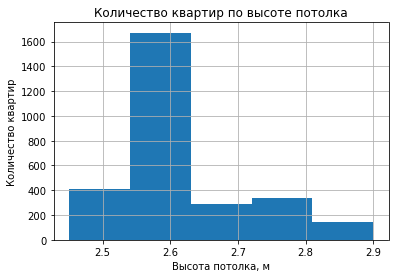

In [66]:
Saint_P_df_centre['ceiling_height'].hist(bins=5) #построение гистограммы столбца
plt.title('Количество квартир по высоте потолка')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество квартир')
plt.show()

In [67]:
Saint_P_df_centre['ceiling_height'].describe()

count    2859.000000
mean        2.627485
std         0.095774
min         2.450000
25%         2.600000
50%         2.600000
75%         2.650000
max         2.900000
Name: ceiling_height, dtype: float64

Большинство домов имеют стандартную высоту потолка в 2.6 метра.

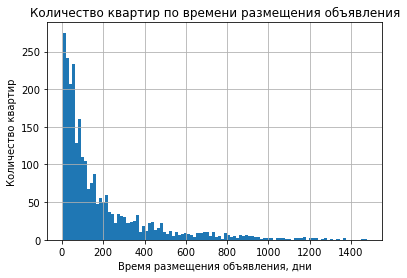

In [68]:
Saint_P_df_centre['days_exposition'].hist(bins=100) #построение гистограммы столбца
plt.title('Количество квартир по времени размещения объявления')
plt.xlabel('Время размещения объявления, дни')
plt.ylabel('Количество квартир')
plt.show()

In [69]:
Saint_P_df_centre['days_exposition'].describe()

count    2596.000000
mean      192.044299
std       234.838144
min         3.000000
25%        43.000000
50%        98.000000
75%       241.000000
max      1477.000000
Name: days_exposition, dtype: float64

In [70]:
good_df['days_exposition'].describe()

count    17648.000000
mean       169.186480
std        207.117092
min          1.000000
25%         43.000000
50%         90.000000
75%        214.000000
max       1580.000000
Name: days_exposition, dtype: float64

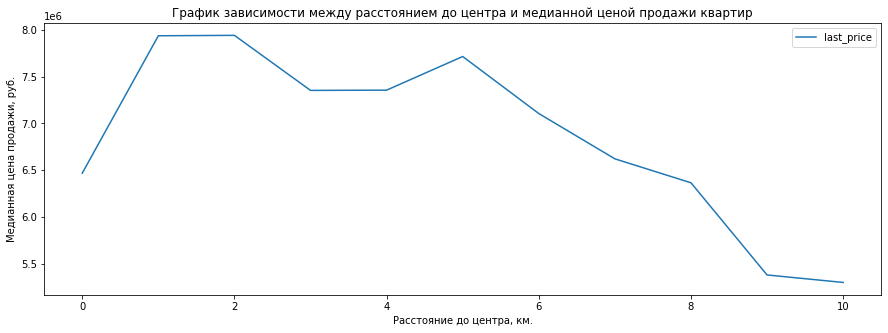

In [71]:
Saint_P_df_centre.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').plot(figsize=(15,5))
plt.title('График зависимости между расстоянием до центра и медианной ценой продажи квартир')
plt.xlabel('Расстояние до центра, км.')
plt.ylabel('Медианная цена продажи, руб.')
plt.show()

С увеличением расстояния до центра квартиры становятся дешевле

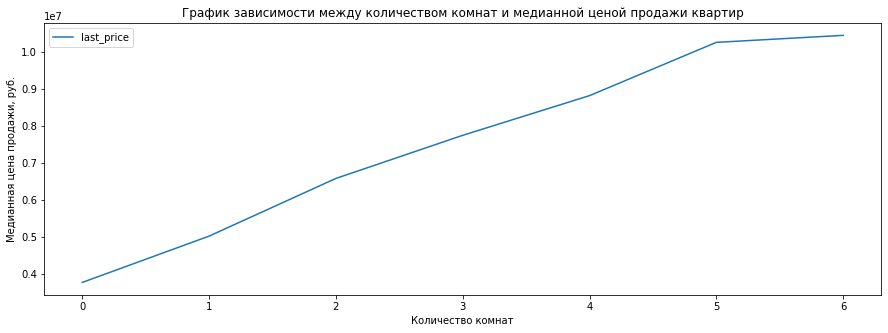

In [72]:
Saint_P_df_centre.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(figsize=(15,5))
plt.title('График зависимости между количеством комнат и медианной ценой продажи квартир')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена продажи, руб.')
plt.show()

С увеличением комнат стоимость квартир увеличавается

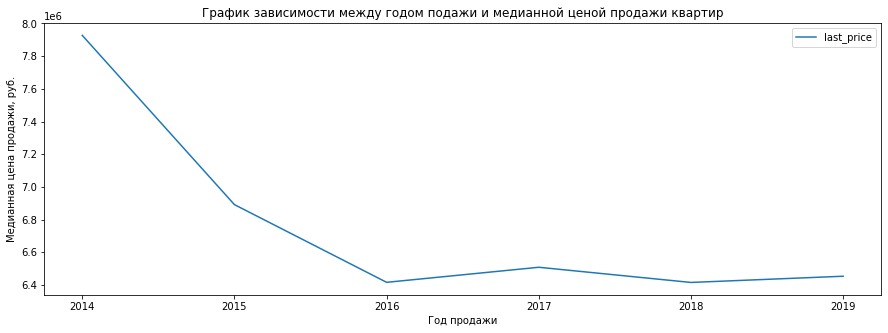

In [73]:
Saint_P_df_centre.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot(figsize=(15,5))
plt.title('График зависимости между годом подажи и медианной ценой продажи квартир')
plt.xlabel('Год продажи')
plt.ylabel('Медианная цена продажи, руб.')
plt.show()

Стоимость квартир в центре Петербурга снижалась до 2016 года и затем не наметилось повышение цен на квартиры.

В среднем, объявление по продаже квартиры в центре публикуется на сайте 116 дней. Тогда как остальные квартиры в других районах в среднем продаются 97 дней.

Исходя из анализа квартир в центре Санкт-Петербурга, можно сделат вывод, что цены на квартиры в среднем на 2 миллиона дороже. Большинстов квартир двухкомнатные, тогда как в других районах города преобладают как двух-, так трехкомнатые квартиры. Квартиры в центре продаются дольше, чем квартиры в дургих районах. 

## Общий вывод

В данном проекте была посчитана рыночная стоимость квартир за квадратный метр в Петербурге и Ленинградской области. Была посчитана также рыночная стоимость квартир в центре Петербурга, исходя из нескольких парамтеров: число комнат, этаж, удалённость от центра, дата размещения объявления. 

В заключении, можно сказать, что такие параметры, как цена квартиры, этаж, число комнат, удаленность от центра помогут в проверке объявлений на мошеничество. Так, к примеру, квартира на первом или последнем этаже не может стоить дороже такой же этажом выше или ниже.